### Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
cars_df = pd.read_csv( "new_used_car.csv" )

In [4]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model,mileage_new,engine_new,power_new
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,10,maruti,wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,hyundai,creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9,honda,jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8,maruti,ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,7,audi,a4,15.20,1968.0,140.80


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5052 non-null   object 
 1   Location           5052 non-null   object 
 2   Year               5052 non-null   int64  
 3   Kilometers_Driven  5052 non-null   int64  
 4   Fuel_Type          5052 non-null   object 
 5   Transmission       5052 non-null   object 
 6   Owner_Type         5052 non-null   object 
 7   Mileage            5052 non-null   object 
 8   Engine             5028 non-null   object 
 9   Power              5028 non-null   object 
 10  Seats              5023 non-null   float64
 11  New_Price          642 non-null    object 
 12  Price              5052 non-null   float64
 13  age                5052 non-null   int64  
 14  make               5052 non-null   object 
 15  model              5052 non-null   object 
 16  mileage_new        5052 

### Feature Set Selection

In [12]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'make', 'model', 'mileage_new',
       'engine_new', 'power_new'],
      dtype='object')

In [6]:
x_features = ['Kilometers_Driven', 'Fuel_Type',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new',
              'power_new', 'Location']
## model of the car is not included in the model

In [9]:
cat_features = ['Fuel_Type',
                'Transmission', 'Owner_Type', 
                'make', 'Location']

In [10]:
num_features = list(set(x_features) - set(cat_features))

In [11]:
num_features

['power_new', 'Seats', 'mileage_new', 'engine_new', 'Kilometers_Driven']

### Dropping Null Values

In [13]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [14]:
cars_df.shape

(4953, 11)

### Encode Categorical Variables

In [15]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features)

In [16]:
encoded_cars_df.sample(5)

,Kilometers_Driven,Seats,mileage_new,engine_new,power_new,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
3236,35000,5.0,18.6,1197.0,81.83,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2361,65694,5.0,18.9,998.0,67.10,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1216,70000,8.0,12.8,2494.0,102.00,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2830,12794,5.0,19.0,1199.0,88.70,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
777,95000,8.0,12.8,2494.0,102.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
encoded_cars_df.columns

Index(['Kilometers_Driven', 'Seats', 'mileage_new', 'engine_new', 'power_new',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'make_ambassador', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_datsun', 'make_fiat', 'make_force', 'make_ford',
       'make_honda', 'make_hyundai', 'make_isuzu', 'make_jaguar', 'make_jeep',
       'make_land', 'make_mahindra', 'make_maruti', 'make_mercedes-benz',
       'make_mini', 'make_mitsubishi', 'make_nissan', 'make_porsche',
       'make_renault', 'make_skoda', 'make_tata', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
    

In [18]:
encoded_cars_df.shape

(4953, 53)

### Setting X and y variables

In [19]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state= 100)

In [53]:
X_train.shape

(3962, 53)

In [54]:
X_train[0:5]

,Kilometers_Driven,Seats,mileage_new,engine_new,power_new,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
3185,26000,5.0,18.90,1197.0,82.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1064,78000,5.0,16.10,1298.0,88.2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
153,25000,8.0,19.98,1461.0,108.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
726,60805,5.0,26.00,1498.0,98.6,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3307,50000,5.0,19.30,1968.0,141.0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [24]:
X_test.shape

(991, 53)

In [57]:
y_train.shape

(3962,)

### Linear Models

Assumes linear relationship between features and outcome variable.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lreg_v1 = LinearRegression()

In [28]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [49]:
lreg_v1.intercept_

-1.5277081289395413

In [30]:
lreg_v1.coef_

array([-3.98949664e-05,  7.09900967e-01,  3.69231127e-02, -1.07979113e-04,
        5.13586205e-02, -6.15621230e-02,  1.36934247e+00, -7.88060711e-01,
       -5.19719635e-01,  5.89146182e-01, -5.89146182e-01,  1.44732441e+00,
       -1.60085918e+00,  4.62158971e-01, -3.08624198e-01,  5.89536219e-02,
        2.69041847e+00,  1.54805251e+00, -2.74665131e+00, -2.33753927e+00,
       -2.08287003e+00, -8.21562428e-01, -1.13667688e+00, -1.35312655e+00,
       -9.10878694e-01,  4.14535667e+00, -1.40295192e+00,  5.66600762e+00,
        6.20506346e+00, -1.55440899e+00, -9.75689292e-01,  1.82716197e+00,
        7.10132417e+00,  9.39058638e-01, -1.15817411e+00, -1.10247312e+01,
       -1.21043764e+00, -1.03990347e+00, -2.16236897e+00,  1.86099235e+00,
       -1.29252715e+00,  1.16810845e+00, -2.32463146e-02,  7.37509232e-01,
       -1.45791070e-01,  1.43999900e+00, -5.57389349e-01,  4.82458987e-01,
        1.83215202e-02,  5.81953962e-01, -1.86391732e+00, -5.75692966e-01,
       -9.42056789e-02])

In [31]:
dict(zip(X_train.columns, np.round(lreg_v1.coef_, 3)))

{'Kilometers_Driven': -0.0,
 'Seats': 0.71,
 'mileage_new': 0.037,
 'engine_new': -0.0,
 'power_new': 0.051,
 'Fuel_Type_CNG': -0.062,
 'Fuel_Type_Diesel': 1.369,
 'Fuel_Type_LPG': -0.788,
 'Fuel_Type_Petrol': -0.52,
 'Transmission_Automatic': 0.589,
 'Transmission_Manual': -0.589,
 'Owner_Type_First': 1.447,
 'Owner_Type_Fourth & Above': -1.601,
 'Owner_Type_Second': 0.462,
 'Owner_Type_Third': -0.309,
 'make_ambassador': 0.059,
 'make_audi': 2.69,
 'make_bmw': 1.548,
 'make_chevrolet': -2.747,
 'make_datsun': -2.338,
 'make_fiat': -2.083,
 'make_force': -0.822,
 'make_ford': -1.137,
 'make_honda': -1.353,
 'make_hyundai': -0.911,
 'make_isuzu': 4.145,
 'make_jaguar': -1.403,
 'make_jeep': 5.666,
 'make_land': 6.205,
 'make_mahindra': -1.554,
 'make_maruti': -0.976,
 'make_mercedes-benz': 1.827,
 'make_mini': 7.101,
 'make_mitsubishi': 0.939,
 'make_nissan': -1.158,
 'make_porsche': -11.025,
 'make_renault': -1.21,
 'make_skoda': -1.04,
 'make_tata': -2.162,
 'make_toyota': 1.861,
 'm

### Predict on test set

In [33]:
y_pred = lreg_v1.predict(X_test)

In [35]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [36]:
y_df.sample(10)

,actual,predicted,residual
2640,5.50,4.897696,-0.602304
1160,7.85,6.688870,-1.161130
846,5.88,5.906898,0.026898
2652,4.30,5.232810,0.932810
2680,19.25,12.373200,-6.876800
310,8.75,5.834330,-2.915670
3192,0.90,2.467372,1.567372
2486,2.95,4.735198,1.785198
1075,16.57,14.447802,-2.122198
4307,2.75,2.875741,0.125741


### Measuring Accuracy

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [39]:
mse_v1

4.6112542711098445

In [40]:
rmse_v1 = np.sqrt(mse_v1)

In [41]:
rmse_v1

2.1473831216412793

In [42]:
r2_score(y_test, y_pred)

0.7250388511528723

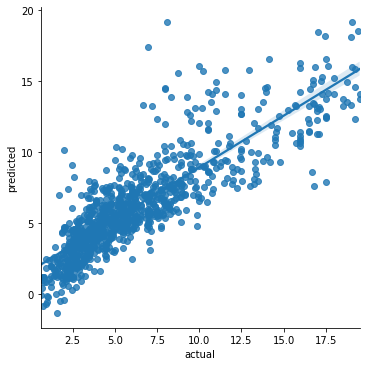

In [43]:
sn.lmplot(data = y_df,
          x = 'actual',
          y = 'predicted');

### Preprocessing data based on business context

1. Removing all cars prior to 2011
2. Making an adjustment to price based on inflation rate. But we need to know the year of sale (not available)
3. Adding the car model as a feature (need to prepare data properly)
4. Taking log of the price (as price is skewed distribution)

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(LinearRegression(),
                         X_train,
                         y_train,
                         cv = 10,
                         scoring = 'r2')

In [46]:
scores

array([0.76475584, 0.74616773, 0.7349686 , 0.69269055, 0.73095877,
       0.70604278, 0.70564274, 0.71666664, 0.73225036, 0.67903508])

In [47]:
scores.mean()

0.7209179106563546

In [48]:
scores.std()

0.024514510324303046

### Saving the model

In [58]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [59]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [61]:
from joblib import dump

In [62]:
dump(my_model, './cars.pkl')

['./cars.pkl']

### Tasks

1. Removing all cars prior to 2011
2. Add age as numerical variable
3. Build a new model
4. Predict on test set and measure the accuracy (RMSE and R Squared values)

### KNN Model

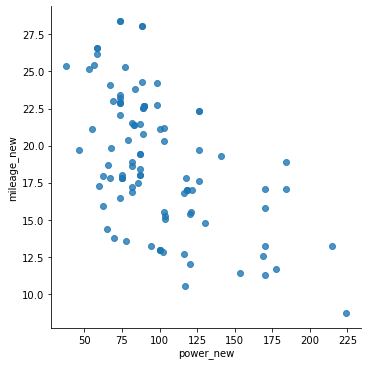

In [66]:
sn.lmplot(data =cars_df.sample(100, random_state = 100),
        x = 'power_new',
        y = 'mileage_new',
        fit_reg = False);

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
knn_v1 = KNeighborsRegressor(n_neighbors=10)

In [69]:
knn_v1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [70]:
y_pred_knn_v1 = knn_v1.predict(X_test)

In [72]:
mse_knn_v1 = mean_squared_error(y_pred_knn_v1,y_test)

In [73]:
np.sqrt(mse_knn_v1)

3.2746881842916054